<a href="https://colab.research.google.com/github/veera9784/play-store-app-review-analysis/blob/main/Aalytics_vidya_job_a_thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading data

In [ ]:
train = pd.read_csv("train_BRCpofr.csv")
test = pd.read_csv('test_koRSKBP.csv')


In [ ]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [ ]:
print(train.shape)


(89392, 12)


In [ ]:
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [ ]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
89387    False
89388    False
89389    False
89390    False
89391    False
Length: 89392, dtype: bool

In [ ]:
train=train.drop_duplicates()


In [ ]:
print(train.shape)


(89392, 12)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.9+ MB


In [ ]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [ ]:
#EDA

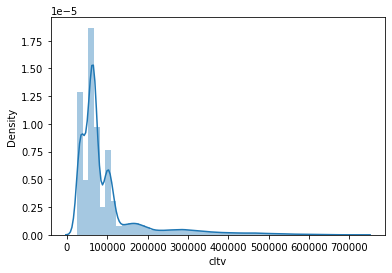

In [ ]:
sns.distplot(train["cltv"])
plt.show()


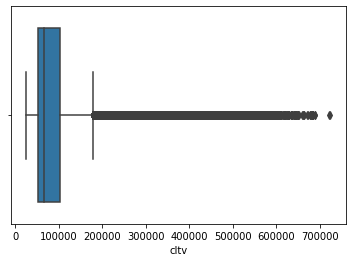

In [ ]:
sns.boxplot(train["cltv"])
plt.show()

In [ ]:
train["cltv"].skew()


2.7530651590601143

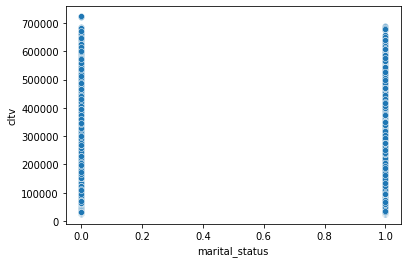

In [ ]:
sns.scatterplot(train["marital_status"],train["cltv"])
plt.show()


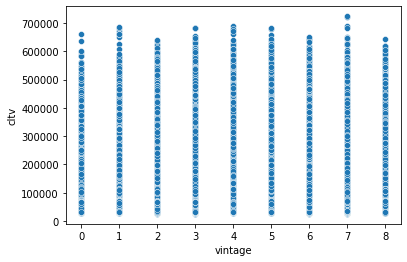

In [ ]:
sns.scatterplot(train["vintage"],train["cltv"])
plt.show()

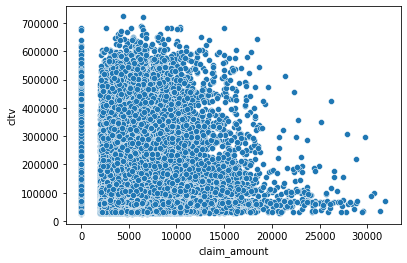

In [ ]:
sns.scatterplot(train["claim_amount"],train["cltv"])
plt.show()

In [ ]:
cat_cols = train.select_dtypes(include="object")


In [ ]:
cat_cols.head()

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,More than 1,A,Gold


In [ ]:
cat_cols.columns

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

In [ ]:
for i in cat_cols:
    print("Unique values in",str(i),"is",train[i].nunique())
    print(train[i].value_counts())
    print("-----------------------------------------")

Unique values in gender is 2
Male      50497
Female    38895
Name: gender, dtype: int64
-----------------------------------------
Unique values in area is 2
Urban    62455
Rural    26937
Name: area, dtype: int64
-----------------------------------------
Unique values in qualification is 3
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64
-----------------------------------------
Unique values in income is 4
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64
-----------------------------------------
Unique values in num_policies is 2
More than 1    60263
1              29129
Name: num_policies, dtype: int64
-----------------------------------------
Unique values in policy is 3
A    56644
B    24635
C     8113
Name: policy, dtype: int64
-----------------------------------------
Unique values in type_of_policy is 3
Platinum    47796
Silver      21010
Gold        20586
Name: t

In [ ]:
for i in train:
    print("Unique values in",str(i),"is",train[i].nunique())
    print(train[i].value_counts())
    print("-----------------------------------------")

Unique values in id is 89392
1        1
59593    1
59601    1
59600    1
59599    1
        ..
29796    1
29795    1
29794    1
29793    1
89392    1
Name: id, Length: 89392, dtype: int64
-----------------------------------------
Unique values in gender is 2
Male      50497
Female    38895
Name: gender, dtype: int64
-----------------------------------------
Unique values in area is 2
Urban    62455
Rural    26937
Name: area, dtype: int64
-----------------------------------------
Unique values in qualification is 3
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64
-----------------------------------------
Unique values in income is 4
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64
-----------------------------------------
Unique values in marital_status is 2
1    51444
0    37948
Name: marital_status, dtype: int64
-----------------------------------------
Unique values i

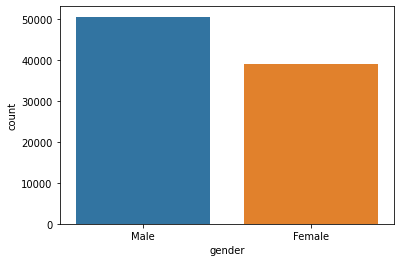

In [ ]:
sns.countplot(train["gender"])
plt.show()


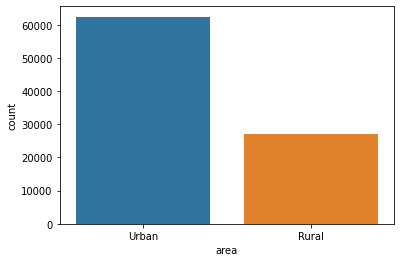

In [ ]:
sns.countplot(train["area"])
plt.show()


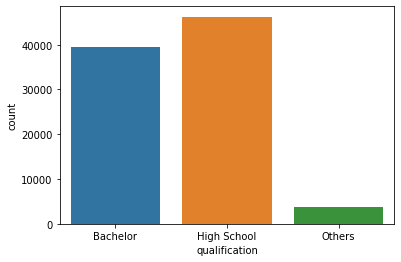

In [ ]:
sns.countplot(train["qualification"])
plt.show()

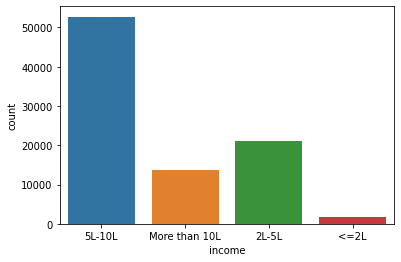

In [ ]:
sns.countplot(train["income"])
plt.show()


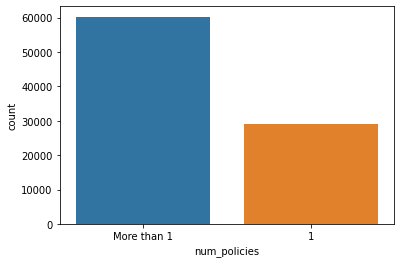

In [ ]:
sns.countplot(train["num_policies"])
plt.show()

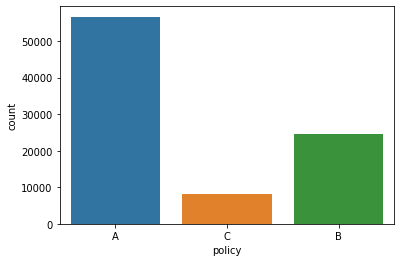

In [ ]:
sns.countplot(train["policy"])
plt.show()


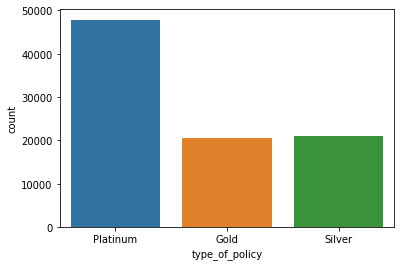

In [ ]:
sns.countplot(train["type_of_policy"])
plt.show()

In [ ]:
#corelations

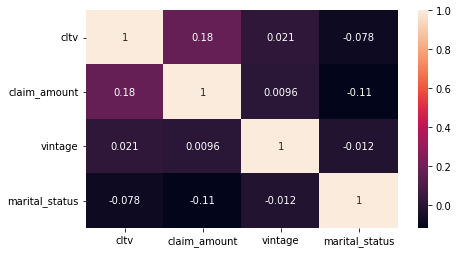

In [ ]:
heatmap = train[['cltv', 'claim_amount', 'vintage','marital_status']]

plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

In [ ]:
#Converting category data to numerical

In [ ]:
from sklearn.preprocessing import OneHotEncoder
train = pd.get_dummies(train[['id','gender', 'area','qualification', 'income', 'marital_status', 'vintage', 'claim_amount','num_policies','policy','type_of_policy','cltv']])

In [ ]:
train.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0


In [ ]:
corr = train.corr()
corr


,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
id,1.000000,0.000171,-0.005824,0.003634,-0.004223,0.000215,-0.000215,-0.000073,0.000073,0.003358,...,-0.005243,0.004789,0.004105,-0.004105,0.000334,-0.001300,0.001462,0.000920,-0.005496,0.005552
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744,-0.070468,0.070468,0.048739,-0.048739,0.015744,...,-0.009521,-0.008394,0.082363,-0.082363,0.029833,-0.042759,0.016472,0.014407,-0.015609,0.004057
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608,-0.005827,0.005827,-0.001145,0.001145,0.027646,...,0.005197,-0.003478,-0.050699,0.050699,-0.073758,0.094780,-0.023712,-0.001513,-0.009788,0.013016
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344,-0.049773,0.049773,-0.451054,0.451054,-0.046636,...,0.076035,-0.122582,-0.155281,0.155281,0.148427,-0.163355,0.005137,0.013483,0.007126,-0.021770
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000,0.001318,-0.001318,-0.133107,0.133107,0.005511,...,0.021668,-0.039879,-0.360414,0.360414,0.035181,-0.058261,0.031613,0.008627,0.021295,-0.033617
gender_Female,0.000215,-0.070468,-0.005827,-0.049773,0.001318,1.000000,-1.000000,0.042516,-0.042516,-0.036120,...,0.036624,0.012460,-0.052871,0.052871,0.007721,-0.003375,-0.007699,0.000745,-0.015893,0.017956
gender_Male,-0.000215,0.070468,0.005827,0.049773,-0.001318,-1.000000,1.000000,-0.042516,0.042516,0.036120,...,-0.036624,-0.012460,0.052871,-0.052871,-0.007721,0.003375,0.007699,-0.000745,0.015893,-0.017956
area_Rural,-0.000073,0.048739,-0.001145,-0.451054,-0.133107,0.042516,-0.042516,1.000000,-1.000000,0.042854,...,-0.093010,0.159729,0.121898,-0.121898,-0.154533,0.176116,-0.014745,-0.013568,-0.014939,0.031046
area_Urban,0.000073,-0.048739,0.001145,0.451054,0.133107,-0.042516,0.042516,-1.000000,1.000000,-0.042854,...,0.093010,-0.159729,-0.121898,0.121898,0.154533,-0.176116,0.014745,0.013568,0.014939,-0.031046
qualification_Bachelor,0.003358,0.015744,0.027646,-0.046636,0.005511,-0.036120,0.036120,0.042854,-0.042854,1.000000,...,-0.010141,0.010687,-0.023337,0.023337,-0.053618,0.080095,-0.034650,-0.020399,-0.019506,0.043201


In [ ]:
train.drop(['gender_Female','gender_Male','area_Rural','area_Urban'],axis =1, inplace=True)


In [ ]:
train.head()


,id,marital_status,vintage,claim_amount,cltv,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0


In [ ]:
#Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop('cltv',axis = 1)
y = train['cltv']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (62574, 19)
The size of training output is (62574,)
**************************************************
The size of testing input is (26818, 19)
The size of testing output is (26818,)


In [ ]:
#model building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [ ]:
#linear regression

In [ ]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.15096141254847273
R^2 score for test: 0.15155803752009656


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print('RMSE:',np.sqrt(mse(y_test,y_pred)))
print("MAE",mae(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 82630.14840720479
MAE 50880.57978742235
R-squared: 0.15155803752009656


In [ ]:
#ridge

In [ ]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [ ]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [ ]:
#decision tree

In [ ]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [ ]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [ ]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute error: ", mae(y_train.values, y_train_pred))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  83645.66257371072
Mean absolute error:  51099.24165104969
R-squared:  0.15505122362251655


In [ ]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute error: ", mae(y_test, y_test_pred))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  82482.3405720986
Mean absolute error:  50123.4711833893
R-squared:  0.15459068866220227


In [ ]:
test=pd.read_csv('test_koRSKBP.csv')


In [ ]:
test

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [ ]:
test.dtypes


id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
dtype: object

In [ ]:
test.drop(['gender','area'],axis =1, inplace=True)


In [ ]:
test


,id,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...
59590,148983,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [ ]:
from sklearn.preprocessing import OneHotEncoder
test = pd.get_dummies(test[['id','qualification', 'income', 'marital_status', 'vintage', 'claim_amount','num_policies','policy','type_of_policy']])

In [ ]:
test.head()


,id,marital_status,vintage,claim_amount,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,89393,0,6,2134,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,89394,0,4,4102,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
2,89395,1,7,2925,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
3,89396,1,2,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1
4,89397,0,5,14059,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1


In [ ]:
#y_pred_lr = lr.predict(test)
#y_test_ridge_pred = ridge_regressor.predict(test)

y_test_dt_pred = tree.predict(test)

#y_test_rf_pred = random_regressor.predict(test)

In [ ]:
#test['cltv_lr'] = y_pred_lr
#test['cltv_ridge'] = y_test_ridge_pred

test['cltv'] = y_test_dt_pred

#test['cltv_rf'] = y_test_rf_pred

In [ ]:
test

,id,marital_status,vintage,claim_amount,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver,cltv
0,89393,0,6,2134,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,93832.818760
1,89394,0,4,4102,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,123379.171326
2,89395,1,7,2925,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,93832.818760
3,89396,1,2,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,93832.818760
4,89397,0,5,14059,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,130315.148748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,1,6,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,47603.849901
59591,148984,0,6,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,47603.849901
59592,148985,1,4,3323,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,93832.818760
59593,148986,0,1,2886,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,108083.633455


In [ ]:
test.drop(['marital_status','vintage','claim_amount','qualification_Bachelor','qualification_High School','qualification_Others','income_2L-5L','income_5L-10L','income_<=2L','income_More than 10L','num_policies_1','num_policies_More than 1','policy_A','policy_B','policy_C','type_of_policy_Gold','type_of_policy_Platinum','type_of_policy_Silver'],axis =1, inplace=True)



In [ ]:
test

,id,cltv
0,89393,93832.818760
1,89394,123379.171326
2,89395,93832.818760
3,89396,93832.818760
4,89397,130315.148748
...,...,...
59590,148983,47603.849901
59591,148984,47603.849901
59592,148985,93832.818760
59593,148986,108083.633455


In [ ]:
test.to_csv("predictions.csv")